## importing libraries......

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings

In [63]:
# ignore warnings....
warnings.filterwarnings("ignore")

# Eda

In [2]:
# getting the data....
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sub_df = pd.read_csv("sample_submission.csv")

In [3]:
# viewing the training data......
train_df.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [4]:
# data info 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31390 entries, 0 to 31389
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            31390 non-null  int64  
 1   protein_sequence  31390 non-null  object 
 2   pH                31104 non-null  float64
 3   data_source       28043 non-null  object 
 4   tm                31390 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [5]:
# data-types....
train_df.dtypes

seq_id                int64
protein_sequence     object
pH                  float64
data_source          object
tm                  float64
dtype: object

In [6]:
# checking the test data...
test_df.head()

,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [7]:
# checking for null values....
train_df.isna().sum()

seq_id                 0
protein_sequence       0
pH                   286
data_source         3347
tm                     0
dtype: int64

In [8]:
# counting the length of protein_sequence....
train_df["sequence_length"] = train_df["protein_sequence"].apply(len)
train_df.head()

,seq_id,protein_sequence,pH,data_source,tm,sequence_length
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7,341
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5,286
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5,497
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2,265
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5,1451


In [9]:
# getting the min sequence protein 
train_df[train_df["sequence_length"] == min(train_df["sequence_length"])]

,seq_id,protein_sequence,pH,data_source,tm,sequence_length
30277,30277,RPAVT,7.0,doi.org/10.1038/s41592-020-0801-4,50.4,5
30284,30284,RPGSI,7.0,doi.org/10.1038/s41592-020-0801-4,49.2,5


In [10]:
# getting the max sequence protein 
train_df[train_df["sequence_length"] == max(train_df["sequence_length"])]

,seq_id,protein_sequence,pH,data_source,tm,sequence_length
28079,28079,MTTQAPTFTQPLQSVVVLEGSTATFEAHISGFPVPEVSWFRDGQVI...,7.4,NaN,25.0,32767
28080,28080,MTTQAPTFTQPLQSVVVLEGSTATFEAHISGFPVPEVSWFRDGQVI...,7.4,NaN,25.0,32767
28081,28081,MTTQAPTFTQPLQSVVVLEGSTATFEAHISGFPVPEVSWFRDGQVI...,7.4,NaN,25.0,32767
28082,28082,MTTQAPTFTQPLQSVVVLEGSTATFEAHISGFPVPEVSWFRDGQVI...,7.4,NaN,25.0,32767
28083,28083,MTTQAPTFTQPLQSVVVLEGSTATFEAHISGFPVPEVSWFRDGQVI...,7.4,NaN,25.0,32767
28084,28084,MTTQAPTFTQPLQSVVVLEGSTATFEAHISGFPVPEVSWFRDGQVI...,7.4,NaN,25.0,32767
28085,28085,MTTQAPTFTQPLQSVVVLEGSTATFEAHISGFPVPEVSWFRDGQVI...,7.3,NaN,25.0,32767


In [11]:
# getting the unique protein sequence...
train_df["protein_sequence"].unique()

array(['AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVGMIKDAGDDPDVTHGAEIQAFVRFASEDRLEGGEGVGVVTKPGLGVPVGEPAINPVPRRMIWEAVREVTERPLAVTIAIPGGEELAKKTLNPRLGILGGLSVLGTTGVVKPYSTSAFRMSVVQAVGVARANGLLEIAATTGGKSERFAQRLLPHLPEMAFIEMGDFVGDVLRAARKVGVEVVRVVGMIGKISKMADGKTMTHAAGGEVNLSLLLSLLKEAGASPKALKEAEGAATARRFLEIALEEGLELFFVNLVRLAQEKLQAYIGERPFVSVALTDFDEGRCLAAWPDREVYR',
       'AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSRLQAQRRAQRVAWEDGDENVGQTVIPAQEEEGIEKPAEVHPTGKIGAKKLRKLEEKQARKAQREAEEAEREERKRLESQREAEWKKEEERLRLKEEQKEEEERKAQEEQARREHEEYLKLKEAFVVEEEGVSETMTEEQSHSFLTEFINYIKKSKVVLLEDLAFQMGLRTQDAINRIQDLLTEGTLTGVIDDRGKFIYITPEELAAVANFIRQRGRVSITELAQASNSLISWGQDLPAQAS',
       'AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYATLGVAKNANGKDIKKAYYQLAKKYHPDTNKEDPDAGRKFQEVSEAYEVLSDEQKRREYDTYGQTAENIGRQGGGFPGGGAGGFGPEGFSQSWQFRSSIDPEELFRKIFGEGNFRTNSFDDFADSKFGFGQAQEMVMDLTFAQAARGVNKDVNVNVVDQCPKCAGTKCEPGTKPGRCQYCNGTGFETVSTGPFVMRSTCRYCQGTRQHIKYPCSECEGKGRTVQRRKVTVPVPAGIENGQTVRMQVGSKELFVTFRVERSDYFRREGADVHTDAAISLAQAVLGGTVRVQGVYEDQWI

In [12]:
# checking the data source...
train_df["data_source"].value_counts()

doi.org/10.1038/s41592-020-0801-4    24525
10.1021/acscatal.9b05223               211
10.1016/j.bpc.2006.10.014              185
10.7554/eLife.54639                    151
10.1007/s00253-018-8872-1               84
                                     ...  
10.1074/jbc.M001132200                   1
10.1021/bi9530090                        1
10.1016/j.ijbiomac.2008.12.016           1
10.1016/j.jmb.2004.02.073                1
10.1021/bi00219a037                      1
Name: data_source, Length: 324, dtype: int64

In [13]:
# checking the ph value....
train_df["pH"].value_counts()

7.00     26462
7.50       576
8.00       502
3.00       288
2.70       274
         ...  
3.14         1
2.53         1
2.81         1
39.00        1
10.30        1
Name: pH, Length: 115, dtype: int64

In [14]:
np.mean(train_df["pH"])

6.892339248971194

In [15]:
# checking the target column....
train_df["tm"].value_counts()

25.0     1472
20.0      561
50.0      200
45.0      178
49.7      176
         ... 
98.1        1
97.6        1
92.7        1
1.2         1
103.0       1
Name: tm, Length: 770, dtype: int64

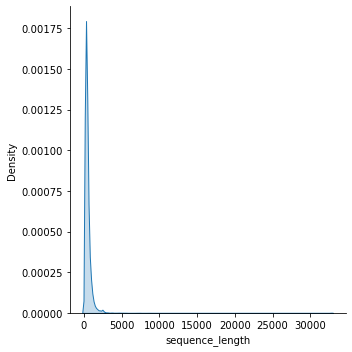

In [16]:
# plotting the length of protein.....
# plt.figure(figsize=(10,10))
sns.displot(data=train_df,x="sequence_length",
                 kind = 'kde', fill = True , palette = "viridis");

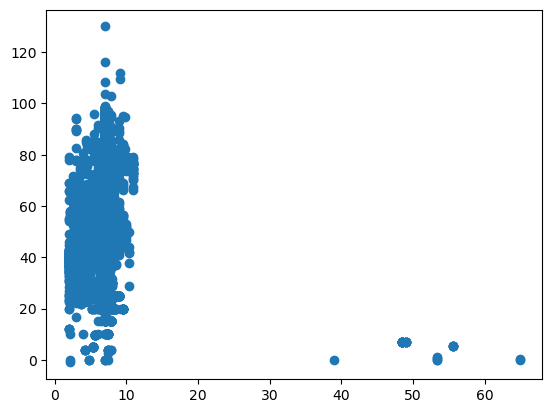

In [17]:
# correlation between ph and tm
plt.scatter(train_df["pH"],train_df["tm"]);

**Note:**
    As the value of pH cann't be greater than 14.


Refer to :
https://www.usgs.gov/media/images/ph-scale-0#:~:text=pHs%20of%20less%20than%207,free%20hydroxyl%20ions%20is%20basic.


So let's plot the pH value with 0-14.

/Users/macbook/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pH', ylabel='tm'>

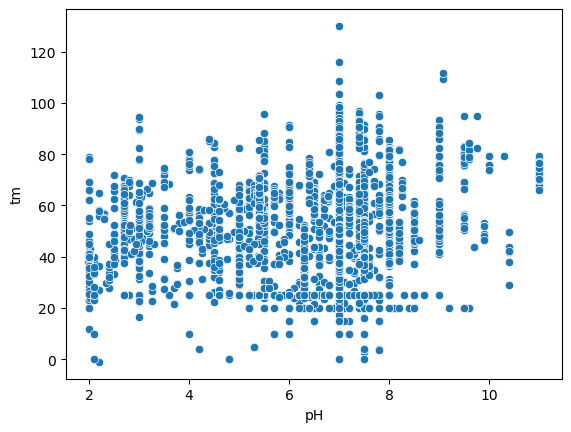

In [18]:
sns.scatterplot(train_df.query("pH <= 14.0")["pH"], train_df.tm)

In [23]:
train_df.head()

,seq_id,protein_sequence,pH,data_source,tm,sequence_length
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7,341
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5,286
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5,497
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2,265
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5,1451


In [24]:
# let's preprocess the protein sequence....
train_df  = train_df[train_df["sequence_length"]<=221]
train_df.reset_index(inplace=True)
sequences = [list(string) for string in train_df["protein_sequence"].values.tolist()]
seq_train = pd.DataFrame(sequences)
seq_train.head()

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,220
0,A,A,F,Q,V,T,S,N,E,I,...,None,None,None,None,None,None,None,None,None,None
1,A,A,G,G,Q,P,Q,G,A,T,...,A,Q,Q,Q,C,N,None,None,None,None
2,A,A,I,G,I,G,I,L,G,G,...,None,None,None,None,None,None,None,None,None,None
3,A,A,K,S,G,D,A,E,E,A,...,None,None,None,None,None,None,None,None,None,None
4,A,A,L,A,L,G,L,P,A,F,...,None,None,None,None,None,None,None,None,None,None


In [28]:
# encode the sequences....

seq_train = seq_train.apply(LabelEncoder().fit_transform)
seq_train.head()

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,220
0,0,0,4,13,17,16,15,11,3,7,...,20,20,19,20,20,20,20,20,20,18
1,0,0,5,5,13,12,13,5,0,16,...,0,13,13,13,1,11,20,20,20,18
2,0,0,7,5,7,5,7,9,5,5,...,20,20,19,20,20,20,20,20,20,18
3,0,0,8,15,5,2,0,3,3,0,...,20,20,19,20,20,20,20,20,20,18
4,0,0,9,0,9,5,9,12,0,4,...,20,20,19,20,20,20,20,20,20,18


In [30]:
train_df.columns

Index(['index', 'seq_id', 'protein_sequence', 'pH', 'data_source', 'tm',
       'sequence_length'],
      dtype='object')

In [32]:
# adding the few more columns....
seq_train[["pH","tm"]] = train_df[["pH","tm"]]

In [33]:
seq_train

,0,1,2,3,4,5,6,7,8,9,...,213,214,215,216,217,218,219,220,pH,tm
0,0,0,4,13,17,16,15,11,3,7,...,19,20,20,20,20,20,20,18,7.0,49.7
1,0,0,5,5,13,12,13,5,0,16,...,13,13,1,11,20,20,20,18,7.0,45.1
2,0,0,7,5,7,5,7,9,5,5,...,19,20,20,20,20,20,20,18,7.0,62.8
3,0,0,8,15,5,2,0,3,3,0,...,19,20,20,20,20,20,20,18,7.0,36.3
4,0,0,9,0,9,5,9,12,0,4,...,19,20,20,20,20,20,20,18,7.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9027,19,16,0,19,13,5,9,13,0,14,...,19,20,20,20,20,20,20,18,7.0,87.1
9028,19,16,17,15,15,4,13,8,15,9,...,19,20,20,20,20,20,20,18,7.0,46.2
9029,19,17,0,3,13,4,5,18,16,17,...,19,20,20,20,20,20,20,18,7.0,51.0
9030,19,17,4,2,1,9,2,2,1,3,...,19,20,20,20,20,20,20,18,7.0,44.6


In [42]:
# checking for null values...
seq_train.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
218    0
219    0
220    0
pH     1
tm     0
Length: 223, dtype: int64

In [51]:
# filling up the null values...
seq_train["pH"] = seq_train["pH"].fillna(seq_train["pH"].median())

seq_train.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
218    0
219    0
220    0
pH     0
tm     0
Length: 223, dtype: int64

In [52]:
# splitting the data into train and test....
X_train,X_test, y_train,y_test = train_test_split(seq_train.drop("tm",axis=1),
                                                 seq_train["tm"],
                                                 test_size=0.1,
                                                 random_state=42)

# checking the length of the sets....
len(X_train),len(X_test),len(y_train),len(y_test)

(8128, 904, 8128, 904)

In [53]:
# let's make a evaluation function....
def calculate_results(y_true,y_pred):
    from scipy import stats

    results = stats.spearmanr(y_test, y_pred)
    return results

# Modelling....
we'll build a series of model and select the one that performs best....

    ~Random Forest Model
    ~Decision Tree Model
    ~Ridge Model
    ~XGBoost Model
    ~Dense Model

# Model 1 : Random Forest Model

In [64]:
# the model which we're going to build first is Random Forest Regressor
model_1 = RandomForestRegressor(n_estimators = 500,
                               )
model_1.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500)

In [65]:
# make prediction and get the results...
model_1_preds = model_1.predict(X_test)
model_1_preds

array([56.35969333, 54.39499333, 53.41693333, 63.79423333, 54.73903333,
       38.21353333, 53.28315   , 61.091935  , 51.25525333, 53.98275   ,
       54.1354    , 45.34066667, 61.40834643, 50.07946667, 46.67727388,
       50.9443    , 27.4204    , 50.6308    , 50.76886667, 53.6803    ,
       53.23042667, 55.5107    , 25.034     , 52.1745181 , 53.90679   ,
       72.41061667, 25.57536286, 53.5644    , 73.3956    , 54.07536   ,
       54.6242    , 50.92610667, 55.8906    , 54.18411424, 40.87675905,
       53.4274    , 53.99544   , 53.30393333, 54.29481667, 42.57162405,
       42.15155333, 52.823     , 55.28475   , 25.09113333, 49.37194429,
       25.        , 60.04631   , 55.69705333, 52.15786667, 48.46209667,
       42.02782071, 54.34249524, 49.422     , 53.3924    , 51.3327    ,
       53.78008   , 25.47648   , 54.3698    , 44.17845333, 57.594     ,
       53.44543143, 56.34396   , 57.03490667, 52.91810032, 54.49890952,
       40.15818095, 56.00698667, 55.24846   , 27.9829    , 51.18

In [66]:
# getting the results...
model_1_results = calculate_results(y_test,model_1_preds)
model_1_results

SpearmanrResult(correlation=0.5213635488508538, pvalue=3.762584563718979e-64)

# Model 2 : Decision Tree Model

In [67]:
model_2 = DecisionTreeRegressor()
model_2.fit(X_train,y_train)

DecisionTreeRegressor()

In [68]:
# model_2 preds....
model_2_preds = model_2.predict(X_test)
model_2_preds

array([ 52.        ,  51.2       ,  80.8       ,  66.8       ,
        47.6       ,  39.        ,  52.4       ,  61.6       ,
        65.5       ,  45.5       ,  22.        ,  43.        ,
        69.        ,  51.5       ,  46.74      ,  41.9       ,
        25.        ,  53.5       ,  36.6       ,  53.8       ,
        34.4       ,  44.2       ,  25.        ,  50.6       ,
        42.7       ,  76.5       ,  25.        ,  91.8       ,
        76.5       ,  39.5       ,  52.7       ,  64.        ,
        58.        ,  80.53333333,  42.8       ,  53.3       ,
        53.3       ,  74.5       ,  71.3       ,  41.76666667,
        42.13333333,  52.9       ,  50.2       ,  25.        ,
        37.        ,  25.        ,  61.3       ,  53.1       ,
        50.4       ,  47.9       ,  44.5       ,  47.        ,
        46.9       ,  52.5       ,  83.        ,  37.8       ,
        25.        ,  65.6       ,  49.5       ,  59.1       ,
        52.        ,  64.7       ,  52.7       ,  53.4 

In [69]:
# model 2 results....
model_2_results = calculate_results(y_test,model_2_preds)
model_2_results

SpearmanrResult(correlation=0.4054431807976304, pvalue=4.353916207728493e-37)

# Model 3 : Ridge

In [70]:
# let's build the Ridge model from sklearn linear model...
model_3 = Ridge()
model_3.fit(X_train,y_train)

Ridge()

In [71]:
# predictions....
model_3_preds = model_3.predict(X_test)
model_3_preds

array([59.49428324, 48.14883227, 54.48183564, 47.14286484, 54.23546211,
       44.64319411, 51.22423037, 41.70902748, 50.14157871, 51.89692838,
       51.78617383, 43.08460625, 43.93487739, 54.08114738, 44.82441216,
       40.91183818, 38.40909464, 49.27668194, 48.71413214, 44.69786574,
       41.65540459, 52.09652143, 42.83944307, 58.12314822, 54.42664993,
       63.07835813, 39.33124097, 45.9866605 , 58.93699034, 54.65505579,
       49.27497   , 44.85986757, 46.38362401, 50.14441683, 48.98331821,
       49.76282267, 50.9753778 , 41.44195084, 51.84572283, 46.55680604,
       46.77619417, 51.55214813, 55.56829369, 32.53042202, 49.66150935,
       47.92474898, 57.29026343, 51.1967472 , 48.61696394, 49.60057469,
       44.18696042, 38.73150473, 50.04666936, 41.81822258, 63.87658503,
       46.60283069, 30.24620573, 61.33508934, 58.05996764, 45.74079043,
       59.84093701, 52.02608482, 55.20179411, 46.59370697, 54.24550499,
       50.45913886, 48.56322722, 55.86639418, 48.39686557, 49.56

In [72]:
# calculate results...
model_3_results = calculate_results(y_test,model_3_preds)
model_3_results

SpearmanrResult(correlation=0.2999084131096811, pvalue=3.0338164448233865e-20)

# Model 4 : XGBoost

In [73]:
# let's build the XGBoost Regressor....
model_4 = XGBRegressor(n_estimators=500, max_depth=15)
model_4.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [74]:
# getting prediction...
model_4_preds = model_4.predict(X_test)
model_4_preds

array([ 5.4517174e+01,  5.1712288e+01,  5.5918892e+01,  5.8232983e+01,
        5.7978561e+01,  3.2039139e+01,  4.9056751e+01,  6.1600300e+01,
        4.7553272e+01,  5.8689236e+01,  4.9929642e+01,  4.5329235e+01,
        6.8999695e+01,  5.6509003e+01,  4.6738338e+01,  5.1640331e+01,
        2.6495455e+01,  4.6000336e+01,  4.1913315e+01,  5.1987984e+01,
        4.8551449e+01,  5.5182755e+01,  2.4587320e+01,  5.0598854e+01,
        5.8971561e+01,  7.6538490e+01,  2.5032589e+01,  5.0043774e+01,
        7.6086227e+01,  5.6087639e+01,  5.3112915e+01,  4.6146950e+01,
        5.7994743e+01,  5.8447639e+01,  4.2769348e+01,  5.9727581e+01,
        4.7829456e+01,  5.7814423e+01,  5.2591160e+01,  4.1768311e+01,
        4.2134533e+01,  5.9868114e+01,  5.5843777e+01,  2.4997334e+01,
        4.5934280e+01,  2.5001978e+01,  6.1291531e+01,  5.7046795e+01,
        5.6735626e+01,  4.7886166e+01,  4.4136333e+01,  5.2046528e+01,
        5.1152588e+01,  6.1521225e+01,  5.4365063e+01,  4.8479660e+01,
      

In [75]:
# model_4_results...
model_4_results = calculate_results(y_test,model_4_preds)
model_4_results

SpearmanrResult(correlation=0.4682529148880313, pvalue=1.8717294933637219e-50)